#### Copyright 2020 Google LLC.

In [11]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Exploratory Data Analysis

[Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis), often shortened to EDA, is a term that you'll hear quite a bit in the field of data science. EDA is the process of examining a dataset to find facts about the data and communicating those facts, often through visualizations.

In order to explore the data and visualize it, some modifications might need to be made to the data along the way. This is often referred to as *data preprocessing*. Though data preprocessing is technically different from EDA, EDA often exposes problems with the data that need to be fixed in order to continue exploring. Because of this tight coupling, we'll clean the data as necessary to help understand the data.

In this lab we will apply our Pandas knowledge to explore a dataset about chocolate. Part 1 of the lab will explore each column in our dataset individually. Part 2 will take the results of our preprocessed data and search for patterns across columns and rows.

## Introduction



### The Dataset: Chocolate Bar Ratings

In this lab we will use a [chocolate bar ratings dataset](https://www.kaggle.com/rtatman/chocolate-bar-ratings). The dataset is from the [Flavors of Cacao](http://flavorsofcacao.com/flavor.html) data.

On the [Kaggle page for the dataset](https://www.kaggle.com/rtatman/chocolate-bar-ratings), we can find some basic information about the dataset. For instance, there are over 1,700 chocolate bars that have been rated. We can also preview the columns found in the dataset:

Column | Data Type | Description
-------|-----------|-------------
Company (Maker-if known) | String | Name of the company manufacturing the bar.
Specific Bean Origin or Bar Name | String | The specific geo-region of origin for the bar.
REF | Number | A value linked to when the review was entered in the database. Higher = more recent.
Review Date | Number | Date of publication of the review.
Cocoa Percent | String | Cocoa percentage (darkness) of the chocolate bar being reviewed.
Company Location | String | Manufacturer base country.
Rating | Number | Expert rating for the bar.
BeanType | String | The variety (breed) of bean used, if provided.
Broad Bean Origin | String | The broad geo-region of origin for the bean.

This is an interesting dataset. Think of the questions that you might be able to answer! A few could be:

*   Is there a relationship between numeric rating and properties such as percentage of cocoa, bean type, origin, and maker?
*   Are some of the properties of cacao beans correlated?
*   Where are the top chocolate bars from?
*   Are there multiple entries for the same bar from the same maker, but with different ratings over the years? If so, has there been any change in the chocolate bar that could account for the differences?
*   Do makers who produce a wide variety of bars have a higher chance of creating a top-rated chocolate bar?

I'm sure you can think of even more. So, what are we waiting for? Let's load the data!

## Acquiring the Data

The data is hosted on Kaggle, so we can use our Kaggle credentials to download the data into the lab. The dataset is located at [https://www.kaggle.com/rtatman/chocolate-bar-ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings). We can use the `kaggle` command line utility to do this.

First off, upload your `kaggle.json` file into the lab now.

Next, run the following command to get the credential files set to the right permissions and located in the correct spot.

In [12]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

chmod: kaggle.json: No such file or directory


Now we can run the `kaggle` command to actually download the data.

In [13]:
! kaggle datasets download rtatman/chocolate-bar-ratings
! ls

chocolate-bar-ratings.zip: Skipping, found more recently modified local copy (use --force to force download)
Exploratory_Data_Analysis_Part_1_Data_Preprocessing.ipynb
chocolate-bar-ratings.zip
slides.pdf


We now have our data downloaded to our virtual machine and stored in the file `chocolate-bar-ratings.zip`.

## Creating a `DataFrame`

We now need to load the data into memory. We can do this easily using Pandas' `read_csv()` function.

In [14]:
import pandas as pd

df = pd.read_csv('chocolate-bar-ratings.zip')
df

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


Let's also make sure that our data types match what was documented:

In [15]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In this output, `object` types are strings while `int64` types are whole numbers and `float64` types are fractional numbers. This seems to match the documentation that we saw for the dataset.

From just a glance at the `DataFrame`, we can see a few facts about our data:

* There are 1,795 rows and 9 columns.
* The columns are the columns we expected based on the documentation, though some have `\n` (new line) embedded in them. We'll need to clean that up.
* The data seems to be sorted by the 'Company' column.
* There is definitely some missing data, as we can see in the 'Bean Type' column.

We will look more closely at each column throughout this lab.

## Cleaning Up Column Names

One of the more frustrating aspects of this dataset is the poor format of the column names. Typing 'Specific Bean Origin\nor Bar Name' in order to access the column is painful.

So our first order of business will be to update the column names.

In [16]:
df.columns = [
  'Company',
  'Specific Bean Origin',
  'REF',
  'Review Date',
  'Cocoa Percent',
  'Company Location',
  'Rating',
  'Bean Type',
  'Broad Bean Origin'
]

df

,Company,Specific Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


That's much better, but the columns are also in an odd order. Information about the company is spread across the columns, and so is the information about the cacao bean. Let's order the columns a little more meaningfully.

This order makes a little more sense:

**Company Information:**
* Company
* Company Location

**Chocolate Bar Information**
* Bean Type
* Specific Bean Origin
* Broad Bean Origin
* Cocoa Percent

**Review Information**
* REF
* Review Date
* Rating

We can reorder the columns by specifically selecting the columns in order and reassigning them to the `df` variable:

In [17]:
df = df[[
  'Company',
  'Company Location',
  'Bean Type',
  'Specific Bean Origin',
  'Broad Bean Origin',
  'Cocoa Percent',
  'REF',
  'Review Date',
  'Rating',
]]

df

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
0,A. Morin,France,,Agua Grande,Sao Tome,63%,1876,2016,3.75
1,A. Morin,France,,Kpime,Togo,70%,1676,2015,2.75
2,A. Morin,France,,Atsane,Togo,70%,1676,2015,3.00
3,A. Morin,France,,Akata,Togo,70%,1680,2015,3.50
4,A. Morin,France,,Quilla,Peru,70%,1704,2015,3.50
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Austria,,Peru,Peru,70%,647,2011,3.75
1791,Zotter,Austria,Forastero,Congo,Congo,65%,749,2011,3.00
1792,Zotter,Austria,Forastero,Kerala State,India,65%,749,2011,3.50
1793,Zotter,Austria,,Kerala State,India,62%,781,2011,3.25


## Examining Each Column


In this section we will examine each column to learn about the data in the column. We will also make changes to the data as needed.

### Column: Company

The 'Company' column is the first in the list, so let's look at it first.

We can tell that the column contains string values. Let's see if any are missing:

In [18]:
df['Company'].isnull().any()

False

No data is missing. Let's now see how many distinct values there are:

In [19]:
df['Company'].unique().size

416

A few hundred is not a terribly long list. Let's print the list in alphabetical order to see how it looks.

In [20]:
for company in sorted(df['Company'].unique()):
  print(company)

A. Morin
AMMA
Acalli
Adi
Aequare (Gianduja)
Ah Cacao
Akesson's (Pralus)
Alain Ducasse
Alexandre
Altus aka Cao Artisan
Amano
Amatller (Simon Coll)
Amazona
Ambrosia
Amedei
Anahata
Animas
Ara
Arete
Artisan du Chocolat
Artisan du Chocolat (Casa Luker)
Askinosie
Bahen & Co.
Bakau
Bar Au Chocolat
Baravelli's
Batch
Beau Cacao
Beehive
Belcolade
Bellflower
Belyzium
Benoit Nihant
Bernachon
Beschle (Felchlin)
Bisou
Bittersweet Origins
Black Mountain
Black River (A. Morin)
Blanxart
Blue Bandana
Bonnat
Bouga Cacao (Tulicorp)
Bowler Man
Brasstown aka It's Chocolate
Brazen
Breeze Mill
Bright
Britarev
Bronx Grrl Chocolate
Burnt Fork Bend
C-Amaro
Cacao Arabuco
Cacao Atlanta
Cacao Barry
Cacao Hunters
Cacao Market
Cacao Prieto
Cacao Sampaka
Cacao Store
Cacao de Origen
Cacao de Origin
Cacaosuyo (Theobroma Inversiones)
Cacaoyere (Ecuatoriana)
Callebaut
Cao
Caoni (Tulicorp)
Captain Pembleton
Caribeans
Carlotta Chocolat
Castronovo
Cello
Cemoi
Chaleur B
Charm School
Chchukululu (Tulicorp)
Chequessett
Chloe Ch

This is some interesting data. Looking at it raises many questions. For instance:

* Should company names like 'Vintage Plantations' and 'Vintage Plantations (Tulicorp)' be changed to the same name?
* Is 'Cacao de Origin' a misspelling of 'Cacao de Origen'?
* Is 'Shattel' a misspelling of 'Shattell'?

These are the types of things you'll see and questions you'll ask when you encounter a new dataset. Rarely is the data in perfect condition. Often you'll spend a considerable amount of time researching topics related to the data in order to make a call about repairing aspects of the data.

In this particular case, it would be great if we could find a master list of all of the chocolate makers in the world. We could then cross reference the names in the dataset with the names in the master list.

Unfortunately, we don't have a master list of chocolate makers. Instead, we will have to rely on manually inspecting the data and researching when things don't look right.

Let's say that for now we are confident that 'Cacao de Origin' and 'Shattel' are misspellings, so we will correct that data. We aren't confident enough to change any of the names with parentheses in them though.

Let's fix our misspellings!

#### Exercise 1: Fixing Misspellings

We have decided that we would like to change every instance of 'Cacao de Origin' to 'Cacao de Origen' and every instance of 'Shattel' to 'Shattell' in the 'Company' column of our dataset. Write the code to modify the values. Make sure your code doesn't have any warnings. At the end of the code block, print the number of unique company names when you are done. There should be two less columns than what you saw above.

**Student Solution**

In [21]:
import pandas as pd

df = pd.read_csv('chocolate-bar-ratings.zip')
df.columns = ['Company', 'Specific Bean Origin', 'REF', 'Review Date',
              'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
              'Broad Bean Origin']
df = df[['Company', 'Company Location', 'Bean Type', 'Specific Bean Origin',
         'Broad Bean Origin', 'Cocoa Percent', 'REF', 'Review Date', 'Rating']]

# Change 'Shattel' to 'Shattell'

#method for changing column values
df['Company'].replace({'Shattel':'Shatell'})

# Change 'Cacao de Origin' to 'Cacao de Origen'

df['Company'].replace({'Cacao de Origin':'Cacao de Origen'})


# Print the number of unique company names

print(len(df.Company.unique()))

416


---

### Column: Company Location

The [documentation](https://www.kaggle.com/rtatman/chocolate-bar-ratings) describes the 'Company Location' column as "*Manufacturer base country*."

Let's take a look at the data. As always, we'll first check to see if any data is missing.

In [22]:
df['Company Location'].isna().any()

False

No missing data.

Now we can see how many unique values there are:

In [23]:
df['Company Location'].unique().shape

(60,)

There are just 60 locations, which is small enough that we can manually inspect the values. Let's print the data.

In [24]:
for location in sorted(df['Company Location'].unique()):
  print(location)

Amsterdam
Argentina
Australia
Austria
Belgium
Bolivia
Brazil
Canada
Chile
Colombia
Costa Rica
Czech Republic
Denmark
Domincan Republic
Ecuador
Eucador
Fiji
Finland
France
Germany
Ghana
Grenada
Guatemala
Honduras
Hungary
Iceland
India
Ireland
Israel
Italy
Japan
Lithuania
Madagascar
Martinique
Mexico
Netherlands
New Zealand
Niacragua
Nicaragua
Peru
Philippines
Poland
Portugal
Puerto Rico
Russia
Sao Tome
Scotland
Singapore
South Africa
South Korea
Spain
St. Lucia
Suriname
Sweden
Switzerland
U.K.
U.S.A.
Venezuela
Vietnam
Wales


Overall, the data looks pretty clean. The column is supposed to contain countries and *most* entries are countries. There are a few problems with the country data though. We found at least five errors in the data. Let's see what you can find.

#### Exercise 2: Fixing Company Location Data

There are at least five errors in the company location data that need to be fixed. Some are fairly easy to spot (spelling errors), but some do require knowledge of what constitutes a country. Take some time to look at the data, and see if you can spot at least two of the issues. Write code to fix the issues.

**Student Solution**

In [25]:
# Fix at least two issues with the 'Company Location' data

#Colombia-->Columbia
#Domincan Republic--> Dominican Republic
df['Company Location'].replace({'Colombia': 'Columbia', 'Domincan Republic': 'Dominican Republic' })

0        France
1        France
2        France
3        France
4        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: Company Location, Length: 1795, dtype: object

---

### Column: Bean Type

Now that our company data is looking a little better, let's move into data about the cocoa going into the chocolate bar itself. The first piece of data is the 'Bean Type'. 'Bean Type' is defined as "*The variety (breed) of bean used, if provided*". This hints that there will be some missing data. Let's check and see.

In [26]:
df['Bean Type'].isna().any()

True

Indeed, we have missing data. Let's see how much is missing.

In [27]:
df[df['Bean Type'].isna()].count()

Company                 1
Company Location        1
Bean Type               0
Specific Bean Origin    1
Broad Bean Origin       1
Cocoa Percent           1
REF                     1
Review Date             1
Rating                  1
dtype: int64

Only one row of data is missing 'Bean Type'. Let's take a look at that row.

In [28]:
df[df['Bean Type'].isna()]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
1544,Soma,Canada,NaN,"Three Amigos(Chuao, Wild Bolivia, D.R.)","Ven, Bolivia, D.R.",70%,676,2011,4.0


Now we have a choice to make about how to handle this missing data. Some options include:

* Leave it as is
* Remove the entire row
* Fill in the data with some value

Leaving undefined values lying around in our data can be problematic. Missing values are not counted and can be tricky to program around.

Removing the entire row actually isn't a bad option in this case. Since it is only one row out of over 1,700, it likely won't have too much effect on any analysis that we do.

As for filling in the row, we can:

* Use 'Unknown' or some other placeholder value
* Actually do research to find the true missing value
* See if there is a reasonable value already in the data

In this case, we are just going to replace the missing value with 'Unknown'.

In [29]:
df.loc[df['Bean Type'].isna(), 'Bean Type'] = 'Unknown'
df[df['Bean Type'].isna()]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating


Now we can see how many unique bean types we have.

In [30]:
df['Bean Type'].unique().size

42

Only 42, let's print them out.

In [31]:
for t in sorted(df['Bean Type'].unique()):
  print(t)

Amazon
Amazon mix
Amazon, ICS
Beniano
Blend
Blend-Forastero,Criollo
CCN51
Criollo
Criollo (Amarru)
Criollo (Ocumare 61)
Criollo (Ocumare 67)
Criollo (Ocumare 77)
Criollo (Ocumare)
Criollo (Porcelana)
Criollo (Wild)
Criollo, +
Criollo, Forastero
Criollo, Trinitario
EET
Forastero
Forastero (Amelonado)
Forastero (Arriba)
Forastero (Arriba) ASS
Forastero (Arriba) ASSS
Forastero (Catongo)
Forastero (Nacional)
Forastero (Parazinho)
Forastero(Arriba, CCN)
Forastero, Trinitario
Matina
Nacional
Nacional (Arriba)
Trinitario
Trinitario (85% Criollo)
Trinitario (Amelonado)
Trinitario (Scavina)
Trinitario, Criollo
Trinitario, Forastero
Trinitario, Nacional
Trinitario, TCGA
Unknown
 


The data looks pretty good. But there is a small little problem. After 'Unknown' there seems to be an empty line. What is that?

It turns out that it is a whitespace character. We thought we had only one missing value, but it looks like there are some values that are present but are white space. Let's see how many.

White space can be tricky because there are many different encodings that render as white space. Let's find out exactly which space character this is.

To get the space(s) we can sort the 'Bean Type' values again and get the last one, since we see the space last in the list. We can then print the space as hexadecimal characters.

In [32]:
space = sorted(df['Bean Type'].unique())[-1]
print(", ".join("0x{:02x}".format(ord(c)) for c in space))

0xa0


We get `0xa0` which is the ASCII code for [non-breaking space](https://en.wikipedia.org/wiki/Non-breaking_space). This is different from the white space that you get when you hit the space bar. That space is encoded `0x20`.

Let's see how many of these there are:

In [33]:
df[df['Bean Type'] == chr(0xa0)]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
0,A. Morin,France,,Agua Grande,Sao Tome,63%,1876,2016,3.75
1,A. Morin,France,,Kpime,Togo,70%,1676,2015,2.75
2,A. Morin,France,,Atsane,Togo,70%,1676,2015,3.00
3,A. Morin,France,,Akata,Togo,70%,1680,2015,3.50
4,A. Morin,France,,Quilla,Peru,70%,1704,2015,3.50
...,...,...,...,...,...,...,...,...,...
1787,Zotter,Austria,,Santo Domingo,Dominican Republic,70%,879,2012,3.75
1789,Zotter,Austria,,"Indianer, Raw",,58%,883,2012,3.50
1790,Zotter,Austria,,Peru,Peru,70%,647,2011,3.75
1793,Zotter,Austria,,Kerala State,India,62%,781,2011,3.25


Almost 900! Let's encode those as 'Unknown' also.

#### Exercise 3: Fixing Non-Breaking Space

There are non-breaking space characters, `0xa0` in the 'Bean Type' column. Replace these values with the word 'Unknown'.

**Student Solution**

In [34]:
df['Bean Type'].replace({chr(0xa0):'Unknown'})

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
          ...    
1790      Unknown
1791    Forastero
1792    Forastero
1793      Unknown
1794      Unknown
Name: Bean Type, Length: 1795, dtype: object

---

### Column: Specific Bean Origin

Let's look at our next column: 'Specific Bean Origin'. 'Specific Bean Origin' is a string column that contains the "*specific geo-region of origin for the bar*."

First, we'll see if we are missing any data in the 'Specific Bean Origin' column.

In [35]:
df['Specific Bean Origin'].isna().any()

False

Good, we don't have any 'N/A' data. But we learned from the 'Bean' column that we also need to check string columns for being only white space.

A good way to do this is to apply a function that strips leading and trailing white space from every value in a column, and see if the resulting string is zero-length.

In [36]:
df[df['Specific Bean Origin'].apply(lambda x: x.strip()).str.len() == 0]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating


Here we can see that no data was returned, so we don't have any 'Specific Bean Origin' values that are only spaces.

If you run this function and get an error about numbers/floats not having a strip function, you likely have N/A values in your column. Always check `isna()` first.

Now that we know that every row has a 'Specific Bean Origin' value, let's see how many unique values we have.

In [37]:
df['Specific Bean Origin'].unique().size

1039

Over 1,000 values! That is quite a bit of data to manually sift through. Let's look at the first bit of data, up until the first origin that starts with 'B'.

In [38]:
for origin in sorted(df['Specific Bean Origin'].unique()):
  if origin.startswith('B'):
    break
  print(origin)

"heirloom", Arriba Nacional
100 percent
2009 Hapa Nibby
A case of the Xerces Blues, triple roast
ABOCFA Coop
Abinao
Abstract S. w/ Jamaica nibs,batch abs60323.0
Acarigua, w/ nibs
Acopagro
Acul-du-Nord, 2015
Africa
Africa meets Latina
AgroCriso Plantation
Agua Fria; Sucre region
Agua Grande
Akata
Akesson Estate
Akesson P.
Akesson's E., Sambirano V.
Akesson's Estate
Akesson's, batch 4411
Akessons Estate, Sambirano, 2013
Akessons Estate, Sambirano, Ambanja
Akosombo
Almendra Blanca, batch 1004
Alpaco
Alta Verapaz, 2014
Alto Beni
Alto Beni, Covendo Region
Alto Beni, Cru Savage
Alto Beni, Palos Blanco
Alto Beni, Palos Blancos
Alto Beni, Upper Rio Beni, 2014
Alto Beni, Upper Rio Beni, 2015
Alto Beni, Wild Bolivian
Alto Beni, Wild Harvest, Itenez R. 24hr c.
Alto Beni, Wild Harvest, Itenez R., 60hr c.
Alto Beni, Wild Harvest, Limited Ed.
Amazon Basin Blend
Amazonas
Amazonas Frucht
Amazonas w/ nibs
Amazonia
Ambanja, Sambirano Valley
Ambanja, Tsara Valley
Ambanja, batch 1 SRB
Ambolikapiky
Ambolik

This is some pretty ugly data. Most (but not all) rows contain the bean's geographical origin, but some seem to include the year and/or batch numbers as well, and some seem to contain different information entirely ("100 percent").

Looking at the data, we can also see some things that look odd. For instance, "Akesson Estate" and "Akesson's Estate" are likely the same origin. Also, "Ambolikapkly P." clearly looks like a misspelling of "Ambolikapiky P."

We could make all of the "Akesson" origins look the same, but should we? First, let's look at the entire rows for the offending data.

In [39]:
df[(df['Specific Bean Origin'] == 'Akesson Estate') | \
   (df['Specific Bean Origin'] == "Akesson's Estate")]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
807,Hogarth,New Zealand,Trinitario,Akesson's Estate,Madagascar,70%,1712,2016,2.75
1109,Metiisto,Sweden,Trinitario,Akesson Estate,Madagascar,72%,1267,2014,3.50
1301,Pitch Dark,U.S.A.,Trinitario,Akesson Estate,Madagascar,73%,1311,2014,3.25
1483,"Smooth Chocolator, The",Australia,Trinitario,Akesson's Estate,Madagascar,65%,1618,2015,3.25
1484,"Smooth Chocolator, The",Australia,Trinitario,Akesson's Estate,Madagascar,70%,1622,2015,3.50


It is interesting that all of the bean types and origins are alike. It looks like Akesson('s) Estate serves many companies though.

It is tempting to go ahead and change the "Specific Bean Origin" values to make them match, but it is better to do more research into the industry before making those sorts of changes. You might disagree with this decision, and that is perfectly fine. When working with datasets, you will often have to make difficult calls to deal with ambiguous data. Different people will make different decisions, and that's okay.

The "Ambolikapkly P." issue is a little more obvious and can be validated with a quick internet search. The "Ambolikapkly" spelling shows up very few times and always in the context of this data set. The other spelling is much more common. Let's go ahead and fix that.

In [40]:
df.loc[df['Specific Bean Origin'] == 'Ambolikapkly P.', 
       'Specific Bean Origin'] = 'Ambolikapiky P.'

#### Exercise 4: Finding and Repairing Bad Data

There are a few more obvious errors in the 'Specific Bean Origin' column of the dataset. Print out the column, scan the output, and see if you can find any more errors. Write the code to fix the errors. Find at least one error to fix.

The code to print the dataset is below.

In [41]:
for origin in sorted(df['Specific Bean Origin'].unique()):
  print(origin)

"heirloom", Arriba Nacional
100 percent
2009 Hapa Nibby
A case of the Xerces Blues, triple roast
ABOCFA Coop
Abinao
Abstract S. w/ Jamaica nibs,batch abs60323.0
Acarigua, w/ nibs
Acopagro
Acul-du-Nord, 2015
Africa
Africa meets Latina
AgroCriso Plantation
Agua Fria; Sucre region
Agua Grande
Akata
Akesson Estate
Akesson P.
Akesson's E., Sambirano V.
Akesson's Estate
Akesson's, batch 4411
Akessons Estate, Sambirano, 2013
Akessons Estate, Sambirano, Ambanja
Akosombo
Almendra Blanca, batch 1004
Alpaco
Alta Verapaz, 2014
Alto Beni
Alto Beni, Covendo Region
Alto Beni, Cru Savage
Alto Beni, Palos Blanco
Alto Beni, Palos Blancos
Alto Beni, Upper Rio Beni, 2014
Alto Beni, Upper Rio Beni, 2015
Alto Beni, Wild Bolivian
Alto Beni, Wild Harvest, Itenez R. 24hr c.
Alto Beni, Wild Harvest, Itenez R., 60hr c.
Alto Beni, Wild Harvest, Limited Ed.
Amazon Basin Blend
Amazonas
Amazonas Frucht
Amazonas w/ nibs
Amazonia
Ambanja, Sambirano Valley
Ambanja, Tsara Valley
Ambanja, batch 1 SRB
Ambolikapiky
Ambolik

**Student Solution**

In [42]:
df

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
0,A. Morin,France,,Agua Grande,Sao Tome,63%,1876,2016,3.75
1,A. Morin,France,,Kpime,Togo,70%,1676,2015,2.75
2,A. Morin,France,,Atsane,Togo,70%,1676,2015,3.00
3,A. Morin,France,,Akata,Togo,70%,1680,2015,3.50
4,A. Morin,France,,Quilla,Peru,70%,1704,2015,3.50
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Austria,,Peru,Peru,70%,647,2011,3.75
1791,Zotter,Austria,Forastero,Congo,Congo,65%,749,2011,3.00
1792,Zotter,Austria,Forastero,Kerala State,India,65%,749,2011,3.50
1793,Zotter,Austria,,Kerala State,India,62%,781,2011,3.25


In [43]:

#Equateur and not #equator


df['Specific Bean Origin'].replace('Equator','Equateur', inplace = True)
for i in sorted(df['Specific Bean Origin'].unique()):
  print (i)

#df[(df['Specific Bean Origin'] == 'Equator') | (df['Specific Bean Origin'] == 'Equeateur')]
# Repair the data

"heirloom", Arriba Nacional
100 percent
2009 Hapa Nibby
A case of the Xerces Blues, triple roast
ABOCFA Coop
Abinao
Abstract S. w/ Jamaica nibs,batch abs60323.0
Acarigua, w/ nibs
Acopagro
Acul-du-Nord, 2015
Africa
Africa meets Latina
AgroCriso Plantation
Agua Fria; Sucre region
Agua Grande
Akata
Akesson Estate
Akesson P.
Akesson's E., Sambirano V.
Akesson's Estate
Akesson's, batch 4411
Akessons Estate, Sambirano, 2013
Akessons Estate, Sambirano, Ambanja
Akosombo
Almendra Blanca, batch 1004
Alpaco
Alta Verapaz, 2014
Alto Beni
Alto Beni, Covendo Region
Alto Beni, Cru Savage
Alto Beni, Palos Blanco
Alto Beni, Palos Blancos
Alto Beni, Upper Rio Beni, 2014
Alto Beni, Upper Rio Beni, 2015
Alto Beni, Wild Bolivian
Alto Beni, Wild Harvest, Itenez R. 24hr c.
Alto Beni, Wild Harvest, Itenez R., 60hr c.
Alto Beni, Wild Harvest, Limited Ed.
Amazon Basin Blend
Amazonas
Amazonas Frucht
Amazonas w/ nibs
Amazonia
Ambanja, Sambirano Valley
Ambanja, Tsara Valley
Ambanja, batch 1 SRB
Ambolikapiky
Ambolik

---

#### Exercise 5: Top Specific Bean Origins

There are just over 1,000 unique specific bean origins and over 1,700 entries in the dataset. Write code to find the top five most repeated origins. Print the origins and the number of times that each appears in the dataset.

**Student Solution**

In [44]:
# Find the top 5 bar origins

#df.sort_values(by =['Specific Bean Origin']).head(5)
df['Specific Bean Origin'].value_counts().head(5).to_dict()



{'Madagascar': 57,
 'Peru': 45,
 'Ecuador': 42,
 'Dominican Republic': 37,
 'Venezuela': 21}

---

### Column: Broad Bean Origin

The 'Broad Bean Origin' is the "*broad geo-region of origin for the bean.*" In theory, this should be broader regions than the 'Specific Bean Origin' that we just worked with.

Let's dive in. First things first, let's check for N/A values.

In [45]:
df[df['Broad Bean Origin'].isna()].count()

Company                 1
Company Location        1
Bean Type               1
Specific Bean Origin    1
Broad Bean Origin       0
Cocoa Percent           1
REF                     1
Review Date             1
Rating                  1
dtype: int64

It looks like we are missing one origin. Let's take a look at the record.

In [46]:
df[df['Broad Bean Origin'].isna()]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
1072,Mast Brothers,U.S.A.,Trinitario,Madagascar,NaN,72%,999,2012,2.5


The one record has a 'Specific Bean Origin' of 'Madagascar'. Let's see if there are any other chocolates from that same specific origin.

In [47]:
df[df['Specific Bean Origin'] == 'Madagascar']

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
11,A. Morin,France,Criollo,Madagascar,Madagascar,70%,1011,2013,3.00
37,Alain Ducasse,France,Trinitario,Madagascar,Madagascar,75%,1215,2014,3.00
60,Amano,U.S.A.,Trinitario,Madagascar,Madagascar,70%,129,2007,3.50
70,Ambrosia,Canada,Trinitario,Madagascar,Madagascar,66%,1494,2015,3.25
83,Amedei,Italy,Trinitario (85% Criollo),Madagascar,Madagascar,70%,123,2007,4.00
95,Ara,France,Trinitario,Madagascar,Madagascar,75%,1375,2014,3.00
133,Artisan du Chocolat,U.K.,"Criollo, Trinitario",Madagascar,Madagascar,80%,363,2009,3.00
183,Beschle (Felchlin),Switzerland,Trinitario,Madagascar,Madagascar,64%,636,2011,3.00
220,Blue Bandana,U.S.A.,Trinitario,Madagascar,Madagascar,70%,911,2012,3.75
244,Bonnat,France,Trinitario,Madagascar,Madagascar,75%,75,2006,4.00


Quite a few! And they all have a 'Broad Bean Origin' of 'Madagascar', except for our one missing value. It is probably safe to just set the missing value to 'Madagascar' also.

In [48]:
df.loc[(df['Specific Bean Origin'] == 'Madagascar') &
       (df['Broad Bean Origin'].isna()),
       'Broad Bean Origin'] = 'Madagascar'

df[df['Broad Bean Origin'].isna()]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating


Now that we have all of the N/A values handled, let's see if we have an issue with spaces.

In [49]:
df[df['Broad Bean Origin'].apply(lambda x: x.strip()).str.len() == 0]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
77,Amedei,Italy,Blend,Nine,,75%,111,2007,4.00
85,Amedei,Italy,Blend,Toscano Black,,63%,170,2007,3.50
86,Amedei,Italy,Blend,Toscano Black,,70%,40,2006,5.00
87,Amedei,Italy,Blend,Toscano Black,,66%,75,2006,4.00
144,Bahen & Co.,Australia,,Houseblend,,80%,1474,2015,3.25
...,...,...,...,...,...,...,...,...,...
1766,Zak's,U.S.A.,,"House Blend, Batch 2",,60%,1582,2015,3.00
1774,Zokoko,Australia,,Goddess Blend,,65%,1780,2016,3.25
1778,Zotter,Austria,,Raw,,80%,1205,2014,2.75
1780,Zotter,Austria,,Amazonas Frucht,,65%,801,2012,3.50


There are spaces in 73 rows of the data. Let's see what those space values are.

In [50]:
spaces_df = df[df['Broad Bean Origin'].apply(
    lambda x: x.strip()).str.len() == 0]

for space in spaces_df['Broad Bean Origin'].unique():
  print(", ".join("0x{:02x}".format(ord(c)) for c in space))

0xa0


It is that pesky `0xa0` again.

We can fix this by replacing all of the `0xa0` values with 'Unknown'. However, an even better fix would be if we could find similar chocolates with the same 'Specific Bean Origin' and then derive the 'Broad Bean Origin' from that.

Let's see if it is even possible. To do that we can find all of the 'Specific Bean Origin' values for rows with 'Broad Bean Origin' and those without. Then we can use `pd.merge()` to combine the two. If you remember, `pd.merge()` returns only the values which appear in both of the given Series. This means that the return value will show us which values appear both in columns with 'Broad Bean Origin' values and those without.

In [51]:
has_bbo_idx = df['Broad Bean Origin'].apply(lambda x: x.strip()).str.len() > 0

sbo_bbo = df[has_bbo_idx]['Specific Bean Origin']
sbo_no_bbo = df[~has_bbo_idx]['Specific Bean Origin']

pd.merge(sbo_bbo, sbo_no_bbo)

,Specific Bean Origin
0,Signature Blend
1,Blend
2,Blend
3,Blend
4,Amazonas
5,Amazonas
6,Amazonas
7,Amazonas
8,Dark
9,Dark


We have overlap, which is good. In theory, we could use the 'Broad Bean Origin' values from bars that *have* that value to fill in the 'Broad Bean Origin' for bars from the same specific region that *don't have* it.

But look closely at those 'Specific Bean Origin' values. Dark? Raw? Blend?

Those are specific origins. The only two origins that seem even close to regions are 'Amazonas' and 'Orinoco'. Let's look closer at the data for those regions.

In [52]:
df[(df['Specific Bean Origin'] == 'Orinoco') | 
   (df['Specific Bean Origin'] == 'Amazonas')]

,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
777,Habitual,Canada,,Amazonas,,80%,1201,2014,3.00
855,Hummingbird,Canada,Forastero,Amazonas,Venezuela,70%,1097,2013,3.75
938,La Maison du Chocolat (Valrhona),France,,Orinoco,,60%,445,2009,3.75
1503,Solstice,U.S.A.,,Amazonas,Venezuela,70%,1157,2013,3.00
1531,Soma,Canada,Forastero,Orinoco,Venezuela,70%,1173,2013,3.25
1735,Wilkie's Organic,Ireland,Criollo,Amazonas,Peru,75%,1169,2013,2.50
1736,Wilkie's Organic,Ireland,Criollo,Amazonas,Peru,89%,1169,2013,2.75


Yuck! Amazonas turns out to be a very common location. There are states called Amazonas in Brazil, Venezuela, and Peru. Orinoco is a river that runs through both Venezuela and Columbia.

In neither case do we have definitive data to make the call about the 'Broad Bean Origin' for these rows.

Unfortunately that is how it goes when working with data. You get imperfect data into your system, and then you try to research and find the best fix. But you sometimes just have to accept that you are missing data.

#### Exercise 6: Unknown Broad Bean Origins

We have a few 'Broad Bean Origin' values of `0xa0`. Change those values to the literal string 'Unknown'.

**Student Solution**

In [53]:
# Your Code Goes Here



df.loc[df['Broad Bean Origin'] == chr(0xa0), 'Broad Bean Origin'] = 'Unknown'

df[df['Broad Bean Origin'] == 'Unknown']


,Company,Company Location,Bean Type,Specific Bean Origin,Broad Bean Origin,Cocoa Percent,REF,Review Date,Rating
77,Amedei,Italy,Blend,Nine,Unknown,75%,111,2007,4.00
85,Amedei,Italy,Blend,Toscano Black,Unknown,63%,170,2007,3.50
86,Amedei,Italy,Blend,Toscano Black,Unknown,70%,40,2006,5.00
87,Amedei,Italy,Blend,Toscano Black,Unknown,66%,75,2006,4.00
144,Bahen & Co.,Australia,,Houseblend,Unknown,80%,1474,2015,3.25
...,...,...,...,...,...,...,...,...,...
1766,Zak's,U.S.A.,,"House Blend, Batch 2",Unknown,60%,1582,2015,3.00
1774,Zokoko,Australia,,Goddess Blend,Unknown,65%,1780,2016,3.25
1778,Zotter,Austria,,Raw,Unknown,80%,1205,2014,2.75
1780,Zotter,Austria,,Amazonas Frucht,Unknown,65%,801,2012,3.50


---

### Column: Cocoa Percent

Next we will check out the 'Cocoa Percent' column. Remember that 'Cocoa Percent' is "*Cocoa percentage (darkness) of the chocolate bar*."

As usual, we'll first see if there is any missing data:

In [54]:
df['Cocoa Percent'].isna().any()

False

Nothing missing. Great!

Next, we should probably check to make sure that the percentages fall within a valid range: 0-100 or 0.0-1.0. You might recall that 'Cocoa Percent' isn't actually a numeric column, though, so we can't easily find the range. If we sample the data, we see that it looks like percentages from 0 to 100, but they are stored as strings with '%' symbols appended.

In [55]:
df['Cocoa Percent'].sample(10)

769     61%
1311    70%
582     70%
522     70%
1690    68%
1431    68%
74      68%
43      70%
634     62%
1041    68%
Name: Cocoa Percent, dtype: object

We need to remove those percentage signs and convert the digits that remain into numbers. There are a few ways that we can accomplish this.

One is to apply a lambda to each value. The lambda can slice all but the last character of each value and then convert it to a float using core Python syntax.

In [56]:
df['Cocoa Percent'].apply(lambda s: float(s[:-1]))

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: Cocoa Percent, Length: 1795, dtype: float64

An alternative is to use `.str.strip('%')` on the `Series` to remove the percentage sign and then pass the resultant `Series` to `pd.to_numeric()` in order to convert the string values to numbers.

In [57]:
pd.to_numeric(df['Cocoa Percent'].str.strip('%'))

0       63.0
1       70.0
2       70.0
3       70.0
4       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: Cocoa Percent, Length: 1795, dtype: float64

Is one way better than the other? Not necessarily. Feel free to choose whichever feels more natural to you.

Either way, we need to do the conversion and save the new values to 'Cocoa Percent'.

In [58]:
df['Cocoa Percent'] = df['Cocoa Percent'].apply(lambda s: float(s[:-1]))
df['Cocoa Percent'].describe()

count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: Cocoa Percent, dtype: float64

We have now converted our 'Cocoa Percent' column from a string to a floating point number. We can see in the output of the call to `describe()` that the minimum cocoa percentage that we have is 42% and that the maximum is 100%. Both seem like reasonable values for cocoa content in a chocolate bar, so our work here is done.

### Column: REF

The 'REF' column is "*A value linked to when the review was entered in the database. Higher = more recent*." Let's take a look at it.

As always, we should check and see if there are any values missing.

In [59]:
df['REF'].isna().any()

False

We can `describe()` the data to see some basic statistics about it.

In [60]:
df['REF'].describe()

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: REF, dtype: float64

Here we can see that the data ranges from 5 through 1952 and that the mean is pretty high.

Are the values unique?

In [61]:
df['REF'].unique().size

440

Not unique. So 'REF' isn't a unique identifier for our rows of data.

There isn't much more that we can do with this column. We might want to visualize it to see if we can find any meaning. The numbers themselves aren't particularly interesting, but the quantity of each number might be. Let's find and plot the count of each 'REF'.

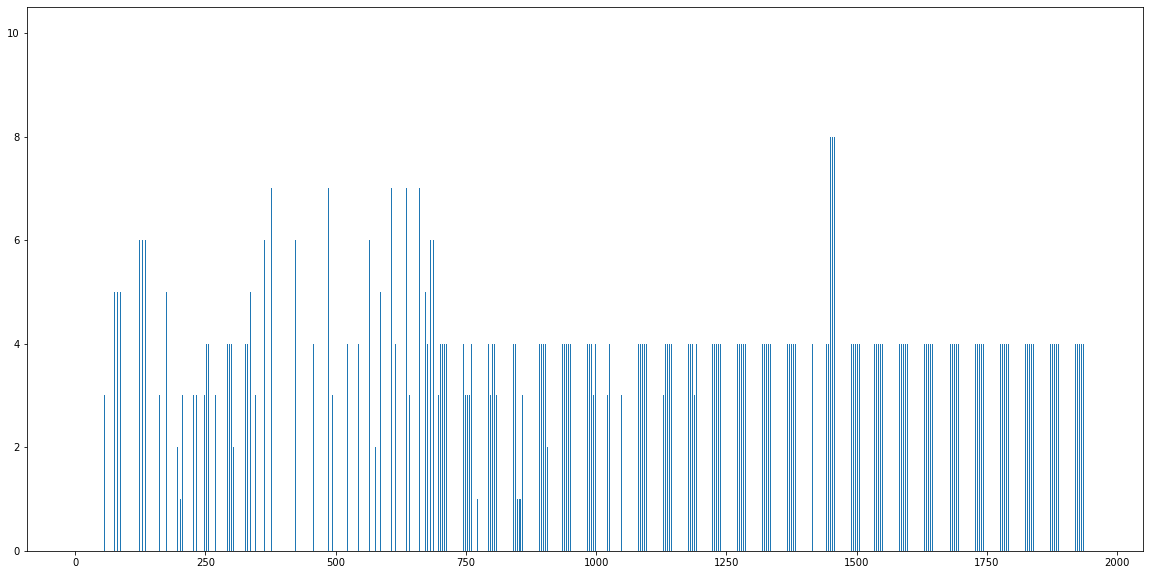

In [62]:
import matplotlib.pyplot as plt

ref_counts = df['REF'].groupby(df['REF']).count()
plt.figure(figsize=(20,10))
plt.bar(ref_counts.index.values, ref_counts)
plt.show()

From this chart we can see that 'REF' values repeat between 1 and 9 times with 4 being the most common. Overall, there isn't much interesting data or data repair for this column.

### Column: Review Date

Review date is the date that the review for a given row was actually published. It is a numeric column.

First, let's see if any data is missing.

In [63]:
df['Review Date'].isna().any()

False

No missing data. Good.

Now we can check some basic statistics about the data.

In [64]:
df['Review Date'].describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: Review Date, dtype: float64

We can see publication dates ranging from 2006 through 2017, which seems like reasonable years. If we had seen dates from the 1800s or the future, we should be worried. This range seems well within reason, though.

There isn't much else that we need to do for this column. Since we only have a few years when reviews were posted, we can create a visualization showing how many reviews were posted each year.

#### Exercise 7: Reviews Per Year

Create a visualization that shows the number of reviews that were created each year.

**Student Solution**

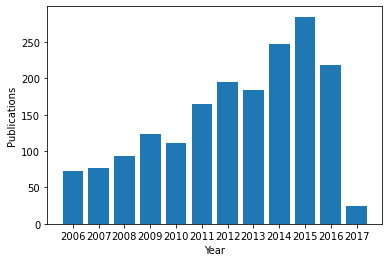

In [65]:
# Reviews Per Year Visualization
import matplotlib.pyplot as plt


#how many times each year from 2006->2017
x = list(range(2006,2018))
numReviews = []
years =[]
stringList = []

for i in x:
  stringList.append(str(i))
years = sorted(df['Review Date'].tolist())
#print (years)

newList =[]
count = 0;
for i in range(len(x)):
  for j in range(len(years)):
    if x[i] == years[j]:
      count = count + 1
  newList.append(count)
  count = 0
plt.ylabel('Publications')
plt.xlabel('Year')
plt.bar(stringList,newList)
plt.show()





#df['Review Date']

---

### Column: Rating

We have now made it to the rating column. The rating is the "*expert rating for the bar*."  From the [documentation](https://www.kaggle.com/rtatman/chocolate-bar-ratings), the possible ratings are:

Rating | Meaning
-------|---------
5 | Elite (Transcending beyond the ordinary limits)
4 | Premium (Superior flavor development, character and style)
3 | Satisfactory (3.0) to praiseworthy(3.75) (well made with special qualities)
2 | Disappointing (Passable but contains at least one significant flaw)
1 | Unpleasant (mostly unpalatable)

Let's take a look at ratings. First off, are any missing?

In [66]:
df['Rating'].isna().any()

False

Nothing missing. Let's describe the column of data.

In [67]:
df['Rating'].describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

It looks like our ratings are indeed floating point values and that they range from 1.0 to 5.0. But are they really continuous?

In [68]:
sorted(df['Rating'].unique())

[1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 5.0]

Interestingly enough, the values don't seem to be continuous, but instead seem to be divided into quarters. Instead of infinite possible values between 1.0 and 5.0, we really have 17 possible values: 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0.

What does this mean for us?

It means that downstream we might be able to use a regression or categorical model in order to predict these values.

If we think about the ratings numbers, their relative position matters. For example, a 4.0 chocolate is better than a 2.0 chocolate. But does the magnitude matter? Is a 4.0 chocolate twice as good as a 2.0 chocolate? What does that even mean?

Let's set our modelers up for success and create a new column that they can use to potentially build models for our data.

#### Exercise 8: Ratings as Categories

In this exercise we are going to create a new column called 'Grade'. Grade is a categorical rating system that maps the following ratings to grades:

Rating | Grade
-------|------
5.00   | A
4.75   | B
4.50   | C
4.25   | D
4.00   | E
3.75   | F
3.50   | G
3.25   | H
3.00   | I
2.75   | J
2.50   | K
2.25   | L
2.00   | M
1.75   | N
1.50   | O
1.25   | P
1.00   | Q

Create the 'Grade' column and add it to our chocolate bar `DataFrame`.

**Student Solution**

In [69]:
# Your Code Goes H
keys = sorted(df['Rating'].unique())
print (keys)
values = []
alphabet = 'ABCDEFGHIJKLMNOPQ'
for i in alphabet:
  values.append(i)

d = dict(zip(keys,values))
print (d)

df['Grade'] = df['Rating'].apply(lambda x: d[x])
df[['Rating', 'Grade']]



#A condition
#[5]

#B condition
#[4.75->4.99]

#C condition
# [4.50-->4.74]

#D condition
#[4.25-->4.49]

#E
#[4.00-->4.24]

#F
#[3.75-->3.99]

#G
#[3.50-->3.74]

#H
#[3.25-->3.49]

#I
#[3.00-->3.24]

#J
#[2.75-->2.99]

#K
#[2.50-->2.74]

#L
#[2.25-->2.49]

#M
#[2.00-->2.24]

#N
#[1.75-->1.99]

#O
#[1.50-->1.74]

#p
#[1.25-->1.49]

#Q
#[1.00->1.24]


[1.0, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 5.0]
{1.0: 'A', 1.5: 'B', 1.75: 'C', 2.0: 'D', 2.25: 'E', 2.5: 'F', 2.75: 'G', 3.0: 'H', 3.25: 'I', 3.5: 'J', 3.75: 'K', 4.0: 'L', 5.0: 'M'}


,Rating,Grade
0,3.75,K
1,2.75,G
2,3.00,H
3,3.50,J
4,3.50,J
...,...,...
1790,3.75,K
1791,3.00,H
1792,3.50,J
1793,3.25,I


---

## Onward

We've now explored every column in our dataset. We have filled in missing values and repaired obviously bad data.

As you can imagine, you can spend near infinite time trying to get a dataset into shape for analysis and modeling. It is common to hear that up to 60% to 80% of a data scientist's time is spent working on the data before it is fed to a model!

In this lab, we only tried to get the data into the state that it was intended to be in. Once we get into modeling, we will learn even more data manipulation techniques that need to be used in order to get models to train well on the data.

But we aren't quite ready for model building yet. There is still more Exploratory Data Analysis (EDA) to do. In part 2 of this unit, we will look more closely at the relationships between the columns.